# Estimación de Costos de Proyectos de Construcción

### Integrantes:
* Santiago Padilla Arias
* Mauricio López Coronado
* Jose Manuel Orozco Martínez 


### Objetivos:

### Objetivo general:


>  -  1-. Estimar el costo total de un proyecto de construcción, considerando la incertidumbre en las principales variables mediante la simulación Monte Carlo, con el fin de apoyar la toma de decisiones financieras y estratégicas.

### Objetivo especificos:

>  -  1-. Implementar una simulación para modelar la variabilidad de los costos principales del proyecto (materiales, mano de obra, equipo, etc.).


>  -  2-. Simular múltiples escenarios para obtener una distribución del costo total del proyecto:


>  -  3-. Determinar la probabilidad de que el costo total se mantenga dentro de un presupuesto específico, previamente definido.



## Proyecto a realizar:
### **Colado de una vialidad en una zona urbana**

El colado de una vialidad en una zona urbana se refiere al proceso de construcción de la superficie de una calle, avenida o camino mediante la aplicación de concreto fresco sobre el terreno preparado. 

Este proceso es fundamental para garantizar una superficie de rodamiento adecuada y resistente para vehículos y peatones en áreas urbanas. 


### **Identifiacion costos:**

  
  **Concreto premezclado:**
  
 * Arena:
 * $P_A \sim U(1850, 2200)$
 * Grava:
 * $P_G \sim U(1150, 1500)$

 **Mano de obra: Obreros, ingenieros y supervisores.**

* Obrero: 
* $M_O \sim N(200, 20)$
* Supervisores: 
* $M_S \sim N(1300, 100)$
* Ingenieros: 
* $M_I \sim N(2200, 300)$ 

 **Equipos:** 

* Camiones de volteo:
* $C_V \sim N(2000, 200) $
* Retroexcavadores:
* $E_R \sim N(4000, 200) $
* Compactadora:
* $E_C \sim N(4000, 200) $
  
 **Mano de obra: Obreros, ingenieros y supervisores.**

 Los costos por retrasos asociados representan entre un $5$% y un $10$% del costo total del proyecto

**Gastos imprevistos:** 

Retrasos por mal clima, permisos o errores cosntructivos


**Tiempo promedio esperado para la elaboración del colado**

4 meses

**Longitud total:**
500 metros


**Espesor:**

.30 m concreto

.50 m grava

1 m arena

**Ancho:**

3.5 metros

**Volumenes:**

Concreto: 525 m3

Arena: 1750 m3

Grava: 875 m3

## Deducción del Modelo:

### Funcion:
**Costos totales del proyecto:**
$$ Costos totales = materiales + mano de obra + maquinaria + imprevistos $$

**Costos de Materiales:**
$$Materiales = acero + concreto + grava + tepetate$$

**Costos de mano de obra:**
$$Mano de obra = (obrero + supervisor + ingeniero) * dias trabajados$$

**Costo de equipos:**
$$ Suma total de la maquinaria = compactadora + retro + camion de volteo  $$

**Gastos imprevistos:**
$$ Costo final = costo total del proyecto * imprevistos $$

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n = 10000000

# Rango de precios de los materiales
precioconcreto = np.random.uniform(1850, 2200, n)
preciograva = np.random.uniform(1150, 1500, n)
precioarena = np.random.uniform(500, 600, n)

#Rango de precios de los trabajadores
obrero = np.random.normal(200, 20) 
supervisor = np.random.normal(1300, 100) 
ing = np.random.normal(2200, 300) 

#Rango de precios de maquinaria
camiones = np.random.normal(2000, 200) 
retro = np.random.normal(3500, 200) 
compactadora = np.random.normal(2250, 200) 

# Consideren scrap
# Material total U(95%, 115%)
m3concreto= np.random.uniform(525*.95, 600*1.15, n)
m3grava= np.random.uniform(1725*.95, 1725*1.15, n)
m3arena= np.random.uniform(875*.95, 875*1.15, n)



In [196]:
import random
import numpy as np

# Parámetros de la caminata
dias = 120  # Número de pasos en la caminata
pos_0 = 0  # Posición inicial
trab = []# Lista para almacenar la caminata
notrab = []
dias_trabajados = 0
dias_perdidos = 0

for i in range(dias):
    
    eleccion = np.random.choice([0, 1], p=[0.07, 0.93])  # dia perdido o dia trabajado
   
    if eleccion == 1:
        dias_trabajados += 1
        trab.append(dias_trabajados)
    else:
        dias_perdidos += 1
        notrab.append(dias_perdidos)

print("Caminata aleatoria:", trab)
print("Caminata aleatoria:", notrab)
print("Días trabajados:", dias_trabajados)
print("Días no trabajados:", dias_perdidos)

Caminata aleatoria: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
Caminata aleatoria: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Días trabajados: 109
Días no trabajados: 11


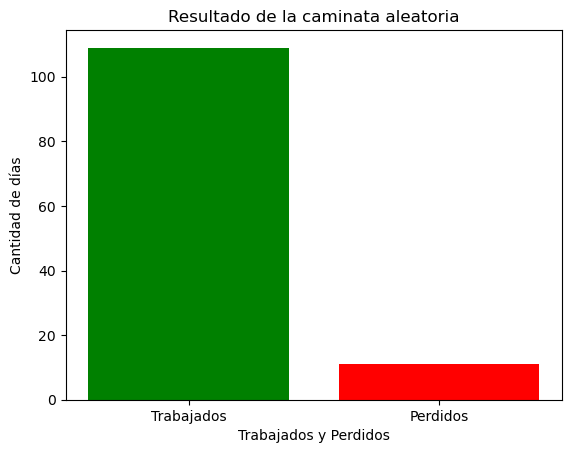

In [256]:
dias = ["Trabajados", "Perdidos"]
cantidad = [dias_trabajados, dias_perdidos]


plt.figure()
plt.bar(dias, cantidad, color=["g", "r"])
plt.title("Resultado de la caminata aleatoria")
plt.xlabel("Trabajados y Perdidos")
plt.ylabel("Cantidad de días")
plt.show()

## Con presupuesto de 5,000,000

In [238]:
presupuesto1 = 5000000

costomaq = (camiones + retro + compactadora) * totaldias
costomo = (obrero + supervisor + ing) * totaldias

# Cálculo de costos totales
costofinal1 = (precioconcreto*m3concreto + preciograva*m3grava + precioarena*m3arena + costomo + costomaq)


# Probabilidad de estar dentro del presupuesto
prob = np.mean(costofinal <= presupuesto1)
print("El costo final es: ", np.mean(costofinal1))
print(f'La probabilidad de que el proyecto entre en el presupuesto es: {prob * 100:.2f}%')

El costo final es:  5631435.185473839
La probabilidad de que el proyecto entre en el presupuesto es: 0.27%


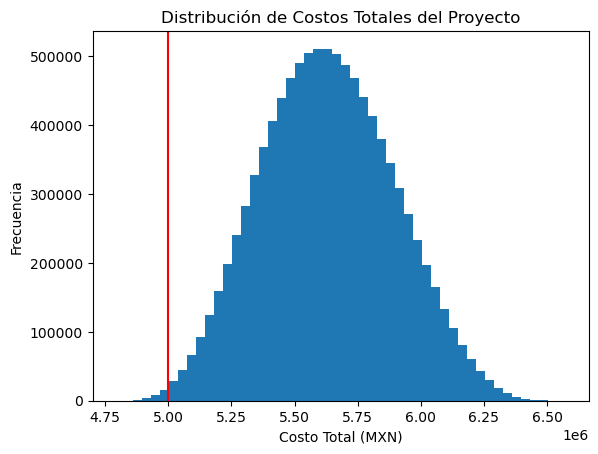

In [239]:

plt.hist(costofinal, bins=50)
plt.axvline(presupuesto1, color='r', )
plt.title('Distribución de Costos Totales del Proyecto')
plt.xlabel('Costo Total (MXN)')
plt.ylabel('Frecuencia')
plt.show()

## Con presupuesto de 5,500,000

In [242]:
presupuesto2 = 5500000

costomaq = (camiones + retro + compactadora) * totaldias
costomo = (obrero + supervisor + ing) * totaldias

# Cálculo de costos totales
costofinal2 = (precioconcreto*m3concreto + preciograva*m3grava + precioarena*m3arena + costomo + costomaq)


# Probabilidad de estar dentro del presupuesto
prob = np.mean(costofinal <= presupuesto2)
print("El costo final es: ", np.mean(costofinal2))
print(f'La probabilidad de que el proyecto entre en el presupuesto es: {prob * 100:.2f}%')

El costo final es:  5631435.185473839
La probabilidad de que el proyecto entre en el presupuesto es: 32.32%


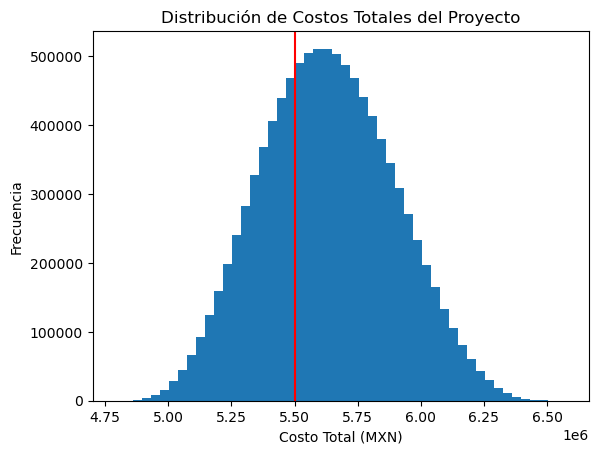

In [244]:

plt.hist(costofinal, bins=50)
plt.axvline(presupuesto2, color='r', )
plt.title('Distribución de Costos Totales del Proyecto')
plt.xlabel('Costo Total (MXN)')
plt.ylabel('Frecuencia')
plt.show()

## Con presupuesto de 6,000,000

In [246]:
presupuesto3 = 6000000

costomaq = (camiones + retro + compactadora) * totaldias
costomo = (obrero + supervisor + ing) * totaldias

# Cálculo de costos totales
costofinal3 = (precioconcreto*m3concreto + preciograva*m3grava + precioarena*m3arena + costomo + costomaq)


# Probabilidad de estar dentro del presupuesto
prob = np.mean(costofinal <= presupuesto3)
print("El costo final es: ", np.mean(costofinal3))
print(f'La probabilidad de que el proyecto entre en el presupuesto es: {prob * 100:.2f}%')

El costo final es:  5631435.185473839
La probabilidad de que el proyecto entre en el presupuesto es: 91.26%


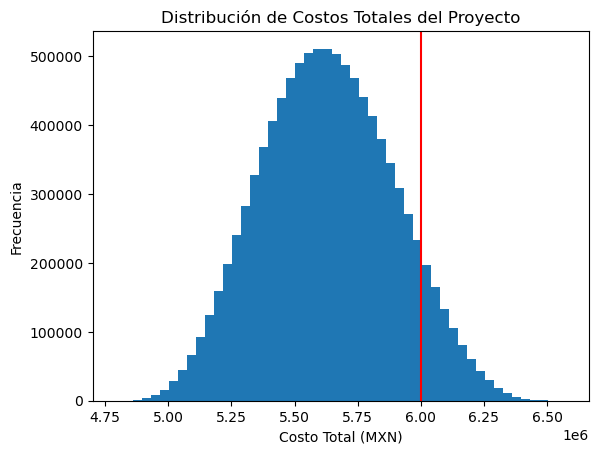

In [248]:

plt.hist(costofinal, bins=50)
plt.axvline(presupuesto3, color='r', )
plt.title('Distribución de Costos Totales del Proyecto')
plt.xlabel('Costo Total (MXN)')
plt.ylabel('Frecuencia')
plt.show()

##### ¿Qué situación representa el modelo?

#### ¿Cuáles son las limitaciones fundamentales?

### ¿Condujo el algoritmo a una solución factible?

### Conclusiones:

### Referencias:

Viga IPR precios. (2018, mayo 16). Acerolaminados. https://acerolaminados.com.mx/viga-ipr-precios/   

Precio Unitario de Concreto Premezclado y Hecho en Obra. (2024, marzo 1).https://preciosunitariosconstruccion.com/basicos/concreto/#google_vignette

Solano, G. (2024, mayo 3). ¿Cuánto gana un albañil por día en México? El Informador :: Noticias de Jalisco, México, Deportes & Entretenimiento. https://www.informador.mx/mexico/Cuanto-gana-un-albanil-por-dia-en-Mexico-20240503-0051.html

(S/f). Gruasyequiposgarcia.com. Recuperado el 29 de octubre de 2024, de https://www.gruasyequiposgarcia.com/gruas-industriales/
Cotizaciones para Transporte de Mercancía de Contrucción. (s/f). Uship.com. Recuperado el 29 de octubre de 2024, de https://www.uship.com/mx/precio-de-env%C3%ADo/mercanc%C3%ADas-industriales-y-de-negocios-2/materiales-equipo-y-maquinaria-de-construcci%C3%B3n-2

Barrientos A, (2024) AB Construye.

López F, (2024) Industrias Losal.


